In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotblib as plt

C:\Users\dell\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv('data.csv')
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [3]:
df = pd.read_csv('data.csv',usecols=['Age','Salary','Purchased'])
df.head()

,Age,Salary,Purchased
0,44.0,72000.0,No
1,27.0,48000.0,Yes
2,30.0,54000.0,No
3,38.0,61000.0,No
4,40.0,NaN,Yes


In [4]:
df.isnull().sum()

Age          1
Salary       1
Purchased    0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Salary'].fillna(df['Salary'].mean(),inplace=True)

In [6]:
df.isnull().sum()

Age          0
Salary       0
Purchased    0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
df.head()

,Age,Salary,Purchased
0,44.0,72000.000000,No
1,27.0,48000.000000,Yes
2,30.0,54000.000000,No
3,38.0,61000.000000,No
4,40.0,63777.777778,Yes


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Purchased'] = le.fit_transform(df['Purchased']) 

In [10]:
df.head()

,Age,Salary,Purchased
0,44.0,72000.000000,0
1,27.0,48000.000000,1
2,30.0,54000.000000,0
3,38.0,61000.000000,0
4,40.0,63777.777778,1


In [11]:
def Change_Purchased(x):
    if x == 'Yes':
        return 1
    else:
        return 0

In [12]:
#df['Purchased'] = df['Purchased'].apply(Change_Purchased)

In [13]:
X = df.iloc[0:,0:2]
y = df.iloc[0:,-1]

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                 random_state=0)

### Standard Scaler 

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [22]:
X_train_scaled

array([[-0.2029809 ,  0.44897083],
       [-1.82168936, -1.41706417],
       [ 0.08478949, -1.0242147 ],
       [ 1.5775984 ,  1.62751925],
       [-0.04111006, -0.14030338],
       [ 0.93011502,  0.94003267],
       [-0.52672259, -0.43494049]])

In [23]:
X_test_scaled

array([[-1.33607682, -0.82778996],
       [ 1.90134009,  2.02036872],
       [ 0.28263164,  0.13250875]])

In [24]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [26]:
X_train_scaled

,Age,Salary
0,-0.202981,0.448971
1,-1.821689,-1.417064
2,0.084789,-1.024215
3,1.577598,1.627519
4,-0.041110,-0.140303
5,0.930115,0.940033
6,-0.526723,-0.434940


In [27]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns) 

In [28]:
X_train_scaled

,Age,Salary
0,-0.202981,0.448971
1,-1.821689,-1.417064
2,0.084789,-1.024215
3,1.577598,1.627519
4,-0.041110,-0.140303
5,0.930115,0.940033
6,-0.526723,-0.434940


In [29]:
X_train.describe()

,Age,Salary
count,7.000000,7.000000
mean,38.253968,62428.571429
std,6.672749,10997.835285
min,27.000000,48000.000000
25%,36.000000,55000.000000
50%,38.000000,61000.000000
75%,41.388889,69500.000000
max,48.000000,79000.000000


In [30]:
np.round(X_train_scaled.describe(),1)

,Age,Salary
count,7.0,7.0
mean,0.0,0.0
std,1.1,1.1
min,-1.8,-1.4
25%,-0.4,-0.7
50%,-0.0,-0.1
75%,0.5,0.7
max,1.6,1.6


##### Above summary shows that after performing standard scaler technique on X_train & X_test, values have been scaled and mean has reached to 0 and Standard Deviation has come to 1.1

Lets just see after scaling effects on both Age & Salary.


### Effects of Scaling 

<AxesSubplot:xlabel='Age', ylabel='Salary'>

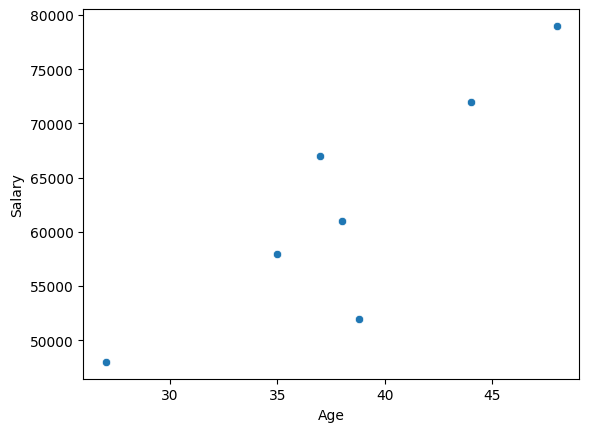

In [31]:
sns.scatterplot(data=X_train,x='Age',y='Salary')

<AxesSubplot:xlabel='Age', ylabel='Salary'>

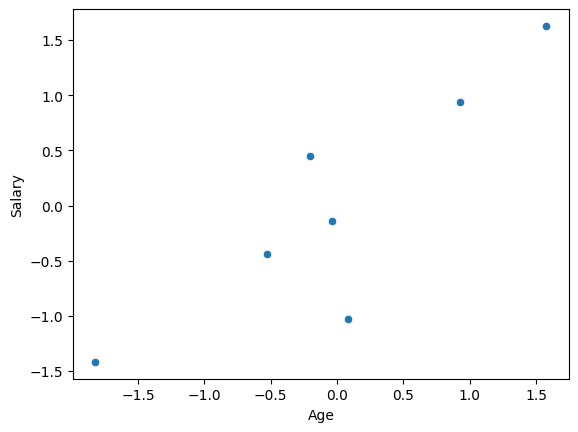

In [32]:
sns.scatterplot(data=X_train_scaled,x='Age',y='Salary')

##### Above two chart shows that even after scaling scatterness of both features remains same. But ranges has been scaled up properly. Data has been mean centered and limited to minium standard deviation

Lets see how scaling has been impacted on PDF of Age & Salary using distplot

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Salary', ylabel='Density'>

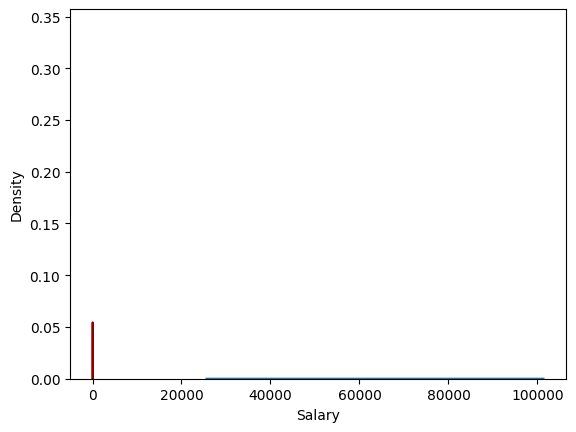

In [33]:
sns.distplot(a=X_train['Age'],bins=50,kde=True,color='darkred')
sns.distplot(a=X_train['Salary'],bins=50,kde=True)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Salary', ylabel='Density'>

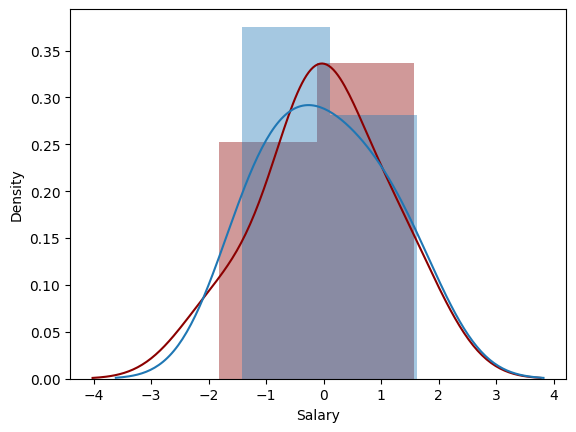

In [34]:
sns.distplot(a=X_train_scaled['Age'],bins=2,kde=True,color='darkred')
sns.distplot(a=X_train_scaled['Salary'],bins=2,kde=True)

##### Above two  chart shows that due to high range different in before scaling, there is no comparison between Age & Salary. But after scaling, there is clear  summary that both features are scaled up properly. And there is more relation between both features.

In short after standarizataion or normalization shape will remain same. It is just scale would get change! 

### Let's Test this scenario by creating Models on Before scale & After scale dataset

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [37]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
print(f'Accuracy score for not Scaled Data is {accuracy_score(y_test,y_pred)}')
print(f'Accuracy score for Scaled Data is {accuracy_score(y_test,y_pred_scaled)}')

Accuracy score for not Scaled Data is 0.0
Accuracy score for Scaled Data is 0.6666666666666666


### List of Algorithms where Scaling is not required! Even if you will do scaling, it will not create any impact!

1. Decision Tree Classifier/Regression
2. Random Forest Classification/Regression
3. Gradient Boosting
4. XGBoosting

##### Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.

A decision tree is a tree-based algorithm. It works on a questionnaire fashion. It asks questions about data with respect to features and again asks questions from the previously given answers and finally gets converges into a result.

Let’s say without any scaling if it asks the model whether 5>-5?

Then, scaling it will ask the model whether 1>-1?

The answer is not changing here. Hence there will be no drastic change in the results whether you apply to scale or not.